In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
from keras.datasets import mnist
#mnist.load_data() comes as two tuples with train and test data
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
#size of the data and shape
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

In [3]:
#look at one image as pixel values to understand the data
for i in range(23):
  print(x_train[0][i])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
 175  26 166 255 247 127   0   0   0   0]
[  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
 225 172 253 242 195  64   0   0   0   0]
[  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
  93  82  82  56  39   0   0   0   0   0]
[  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241
   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0  80 156 107 253 253 205  11   0  43 154
   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0  14   1 154 253  90   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0

In [4]:
#10 numbers to predict
output_size = 10
#create arrays of size 10 with all zeros exept the true number represented as a 1
y_train = keras.utils.to_categorical(y_train, output_size)
y_test = keras.utils.to_categorical(y_test, output_size)

for i in range(10):
    print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [5]:
#normalize data, turn each pixel to a value between [0,1] from [0,255]
x_train = x_train / 255
x_test = x_test / 255

In [6]:
# IMPORTANT: only run this cell this if not using CNN (see cells below)!!
#reshape data to better fit into the NN, -1 to make the lib do the calculation, this case 784
x_train =  x_train.reshape(x_train.shape[0],-1)
x_test =  x_test.reshape(x_test.shape[0],-1)
print(x_train.shape)


(60000, 784)


Choose between CNN NN or Fully Connected NN

CNN:

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

cnn_model = Sequential()

# Add a 2D Convolutional layer with 32 filters and a 3x3 kernel and relu activation
#32 is arbirary but should work well with this data
cnn_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# Add a max pooling layer with 2x2 pool size
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Flatten())

cnn_model.add(Dense(128, activation='relu'))

cnn_model.add(Dropout(0.5))

cnn_model.add(Dense(10, activation='softmax'))

cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

cnn_model.summary()

Fully Connected Layers:

In [9]:
model = Sequential()
model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
batch_size = 512
epochs=10
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
118/118 [==============================] - 1s 2ms/step - loss: 0.5922 - accuracy: 0.8292
Epoch 2/10
118/118 [==============================] - 0s 2ms/step - loss: 0.2271 - accuracy: 0.9341
Epoch 3/10
118/118 [==============================] - 0s 2ms/step - loss: 0.1645 - accuracy: 0.9517
Epoch 4/10
118/118 [==============================] - 0s 2ms/step - loss: 0.1275 - accuracy: 0.9624
Epoch 5/10
118/118 [==============================] - 0s 2ms/step - loss: 0.1054 - accuracy: 0.9689
Epoch 6/10
118/118 [==============================] - 0s 2ms/step - loss: 0.0889 - accuracy: 0.9736
Epoch 7/10
118/118 [==============================] - 0s 2ms/step - loss: 0.0756 - accuracy: 0.9776
Epoch 8/10
118/118 [==============================] - 0s 2ms/step - loss: 0.0649 - accuracy: 0.9800
Epoch 9/10
118/118 [==============================] - 0s 2ms/step - loss: 0.0568 - accuracy: 0.9825
Epoch 10/10
118/118 [==============================] - 0s 2ms/step - loss: 0.0504 - accuracy: 0.9844

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("test loss: ",test_loss)
print("test acc: " , test_acc)

313/313 [==============================] - 0s 645us/step - loss: 0.0704 - accuracy: 0.9781
test loss:  0.07036584615707397
test acc:  0.9781000018119812


313/313 [==============================] - 0s 605us/step


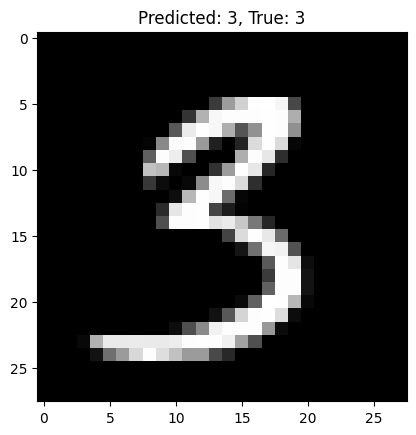

In [14]:
# Single example


random_id = np.random.choice(len(x_test))
x_sample = x_test[random_id]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_id]
y_sample_pred_class = np.argmax(model.predict(x_test), axis=1)[random_id]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=12)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

313/313 [==============================] - 0s 598us/step


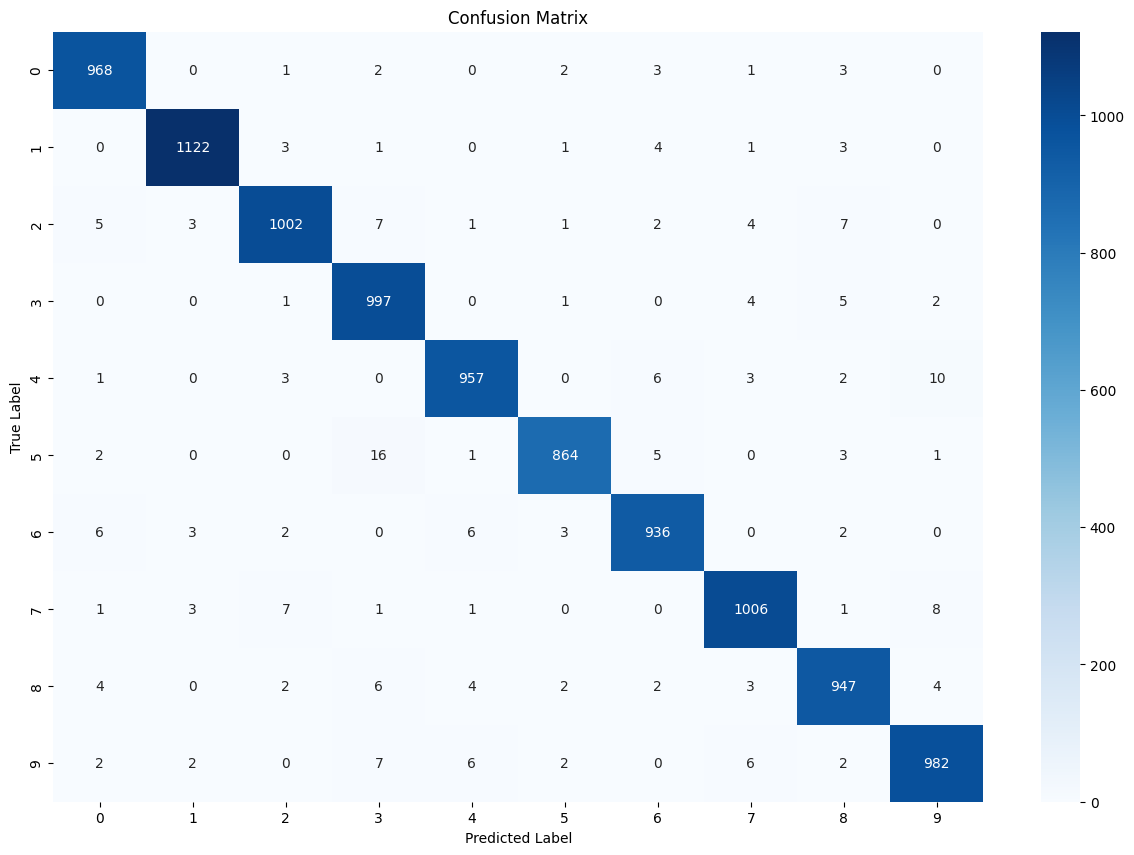

In [15]:
confusion_mtx = confusion_matrix(y_true, np.argmax(model.predict(x_test), axis=1))

# Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');